In [4]:
# Parameters for word embedding

vocab_size = 10000
embedding_dim = 128
max_length = 256

In [5]:
# Load training sentences to setup the tokenizer

import json
from tensorflow.keras.preprocessing.text import Tokenizer

with open("models/train_sentences.json", 'r') as f:
    train_sentences = json.load(f)
f.close()

tokenizer = Tokenizer(num_words=vocab_size, oov_token="OOV")
tokenizer.fit_on_texts(train_sentences)

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.load_weights('models/model_weights_run2.h5')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Replace sentences with ones of which you want to know prediction (in English only)

sentences = [
    "Horrible, this is a bad place. Disgusting.",
    "I recommend to all to have a dinner here.",
    "This is the best place I have ever been!",
    "Not so good, not so bad.",
    "Not so bad, not so good."
]

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding='post')
print(np.shape(padded))

(5, 256)


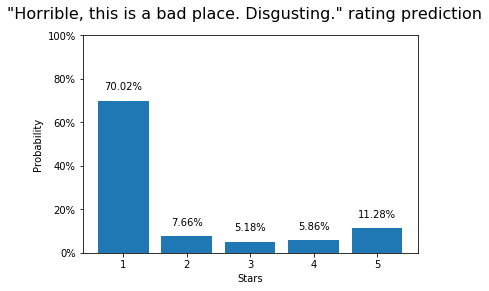

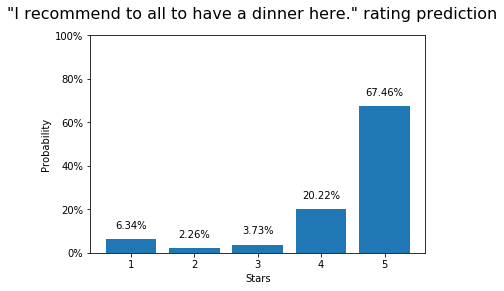

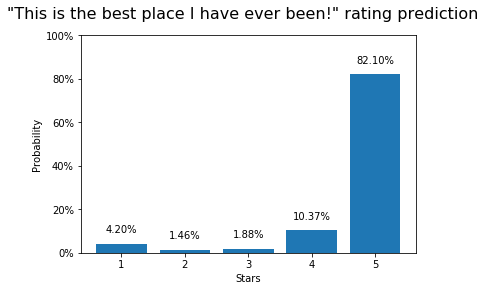

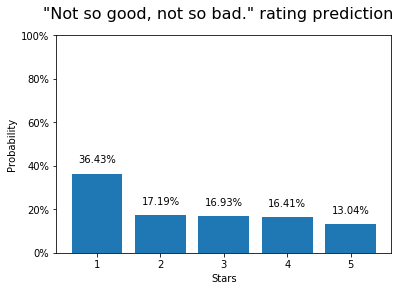

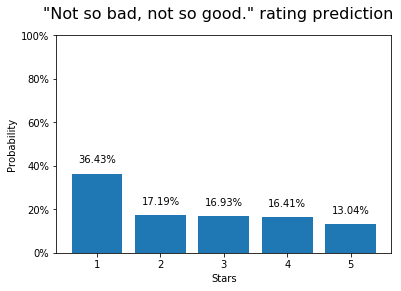

In [15]:
# Make the predicion and print results

result = model.predict(padded)

for i in range(len(result)):    
    fig, axes = plt.subplots(1, 1)
    fig.suptitle('"%s" rating prediction' % sentences[i], fontsize=16)

    axes.bar([k+1 for k in range(5)], [result[i][j] for j in range(5)])
    axes.set_ylabel('Probability')
    axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    axes.set_xlabel('Stars')
    axes.set_ylim(0, 1)
    for h, v in enumerate(result[i]):
        axes.text(h+1, v+0.05, ("%.2f%%" % float(v*100)), horizontalalignment='center')

    plt.show()